In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [65]:
data = pd.read_csv('./full_data.csv', encoding='utf-16', sep='\t')
data.drop(columns=['Unnamed: 0'], inplace=True)
num = int(len(data) * 0.5)

data = data.iloc[:num,:]

In [66]:
data.drop(columns=['除尘房除尘风机频率d','除尘房排潮风机频率(Hz)d','排潮风机电机频率d', 
           'ZC-35除尘风机运行频率d','PC-37排潮风机运行频率d'], inplace=True)
data['时间'] = data['时间'] / 10

In [67]:
data['KLD烘丝机管道风速差压传感器读数d'] = data['KLD烘丝机管道风速差压传感器读数d']-data['KLD烘丝机管道风速差压传感器读数d'][0]

In [68]:
data['KLD烘丝机管道风速差压传感器读数d'].head()

0    0.000000
1    0.002658
2   -0.034514
3    0.005201
4   -0.004407
Name: KLD烘丝机管道风速差压传感器读数d, dtype: float64

In [69]:
from sklearn.utils import shuffle
data = shuffle(data, n_samples=len(data))
data.shape

(20739, 35)

In [71]:
y = data['KLD热风风门开度（%）d']
x = data.drop(columns=['KLD热风风门开度（%）d'])
idx = x.columns.get_loc('KLD烘丝机管道风速差压传感器读数d')
idx

6

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x, y)

In [32]:
y.values.reshape((-1,1))
x.shape, y.shape

((20739, 34), (20739,))

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(len(x_train))

16591


In [34]:
from sklearn.svm import SVR

svr = SVR(C=1, gamma=0.007)
svr_rf = svr.fit(x_train, y_train)
svr_pre = svr_rf.predict(x_train)
svr_rf.score(x_test, y_test)

0.9044219421118437

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso_rf = lasso.fit(x_train, y_train)
lasso_pre = lasso_rf.predict(x_train)
lasso_rf.score(x_test, y_test)

0.7854853820821343

Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

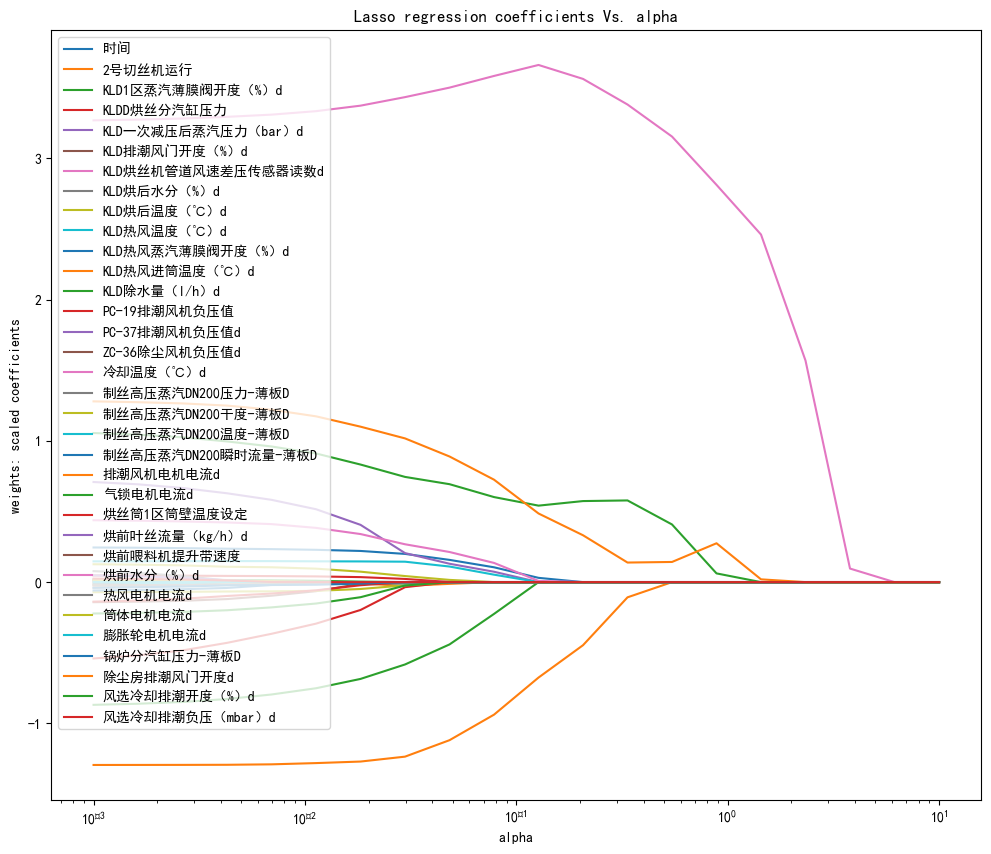

In [50]:
alpha_lasso = 10**np.linspace(-3,1,20)
# alpha_lasso = np.logspace(-10,-2,20,base=10)
# print(alpha_lasso)
lasso = Lasso()
coefs_lasso = []

for i in alpha_lasso:
    lasso.set_params(alpha = i)
    lasso.fit(x_train, y_train)
    coefs_lasso.append(lasso.coef_)
    
plt.figure(figsize=(12,10))
ax = plt.gca()
ax.plot(alpha_lasso, coefs_lasso)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights: scaled coefficients')
plt.title('Lasso regression coefficients Vs. alpha')
plt.legend(data.drop('KLD热风风门开度（%）d',axis=1, inplace=False).columns)
plt.show()

In [74]:
from sklearn.linear_model import LassoCV
lasso_ = LassoCV(alphas=alpha_lasso,cv=5).fit(x_train,y_train)
best_alpha = lasso_.alpha_
best_alpha

0.001

In [75]:
lasso_.coef_, lasso_.score(x_test,y_test)

(array([ 2.36564670e-01,  1.19280886e-02,  9.75868371e-01, -6.05919760e-01,
         7.22074186e-01, -2.27390453e-02,  3.26029233e+00, -5.37565211e-02,
         1.16898488e-01,  1.26725444e-01,  3.33095845e-02, -1.05852728e+00,
        -7.29946865e-01,  5.03136981e-02, -1.40296455e-02, -2.66695113e-01,
         3.59047417e-01,  1.11723147e-01, -6.68496913e-02, -2.70641757e-02,
        -7.56856005e-02, -1.77870259e-02,  2.00093178e-02, -1.89880162e-01,
         5.76556131e-02,  6.13504505e-03,  1.24755899e-03, -1.68746240e-02,
         1.21911891e-02, -5.89383641e-04, -3.63148847e-02,  1.41950886e+00,
        -2.21640714e-01,  3.90649882e-02]),
 0.8382137563138653)

In [76]:
np.random.shuffle(x_test[:, idx])
lasso_.score(x_test,y_test)

-0.22967647009646708

In [45]:
from sklearn.ensemble import RandomForestRegressor
rfg = RandomForestRegressor()
rfg_rf = rfg.fit(x_train, y_train) #.ravel()
rfg_pre = rfg_rf.predict(x_test)
acc = rfg_rf.score(x_test, y_test)

In [48]:
pd.Series(rfg.feature_importances_, index = data.drop('KLD热风风门开度（%）d',axis=1).columns)

时间                     0.003975
2号切丝机运行                0.000002
KLD1区蒸汽薄膜阀开度（%）d       0.004061
KLDD烘丝分汽缸压力            0.000853
KLD一次减压后蒸汽压力（bar）d     0.001705
KLD排潮风门开度（%）d          0.003739
KLD烘丝机管道风速差压传感器读数d     0.879981
KLD烘后水分（%）d            0.003335
KLD烘后温度（℃）d            0.000888
KLD热风温度（℃）d            0.001783
KLD热风蒸汽薄膜阀开度（%）d       0.001124
KLD热风进筒温度（℃）d          0.063302
KLD除水量（l/h）d           0.002627
PC-19排潮风机负压值           0.000025
PC-37排潮风机负压值d          0.000776
ZC-36除尘风机负压值d          0.003741
冷却温度（℃）d               0.000537
制丝高压蒸汽DN200压力-薄板D      0.000359
制丝高压蒸汽DN200干度-薄板D      0.001185
制丝高压蒸汽DN200温度-薄板D      0.001789
制丝高压蒸汽DN200瞬时流量-薄板D    0.001722
排潮风机电机电流d              0.000111
气锁电机电流d                0.000362
烘丝筒1区筒壁温度设定            0.003518
烘前叶丝流量（kg/h）d          0.000428
烘前喂料机提升带速度             0.000972
烘前水分（%）d               0.000277
热风电机电流d                0.000757
筒体电机电流d                0.002341
膨胀轮电机电流d               0.000447
锅炉分汽缸压力-薄板D            0.000288
除尘房排潮风门开